<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

### 1.  상기 [그림 7 ]([그림 8(b)]) 에 대해,  NetworkX 패키지 활용 그래프 컬러링 문제를 풀고,  [그림 9] 의 윗그림 처럼 컬러링된 그래프를 그려보시오. 

In [103]:
dual_graph = {'a': ['b', 'c', 'd', 'e'],
       'b': ['a', 'c', 'd'],
       'c': ['a', 'b', 'd'],
       'd': ['a', 'b', 'c', 'e', 'f', 'g'],
       'e': ['a', 'd', 'f', 'g'],
       'f': ['d', 'e', 'g'],
       'g': ['d', 'e', 'f']   
             }
dual_graph

{'a': ['b', 'c', 'd', 'e'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'd'],
 'd': ['a', 'b', 'c', 'e', 'f', 'g'],
 'e': ['a', 'd', 'f', 'g'],
 'f': ['d', 'e', 'g'],
 'g': ['d', 'e', 'f']}

In [104]:
# Sort dictionary
def sort_dictionary(adjL):
    tmp=dict(sorted(adjL.items()))
  #  print(tmp)
    for s in tmp:
      #  print(s)
      tmp[s].sort()
    return tmp

def node_Edge_from_adjacency_list(adjL):
    adjList=sort_dictionary(adjL)
    TV=list()
    TE=list()
    for key in adjList:
        TV.append(key)
        for i in adjList[key]:
            if (key, i) not in TE and (i, key) not in TE:
                TE.append((key, i))
    return tuple(TV), TE

In [105]:
Nodes, Edges= node_Edge_from_adjacency_list(dual_graph)
print('Nodes=', Nodes)
print('Edges=', Edges)

Nodes= ('a', 'b', 'c', 'd', 'e', 'f', 'g')
Edges= [('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('d', 'e'), ('d', 'f'), ('d', 'g'), ('e', 'f'), ('e', 'g'), ('f', 'g')]


In [106]:
import networkx as nx # networkx 패키지 임포트
G1=nx.Graph()
G1.add_nodes_from(Nodes)
G1.add_edges_from(Edges)

In [107]:
import matplotlib.pyplot as plt
def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
   
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    if not color : color = 'cyan'
    if not pos : pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

In [108]:
import copy
color_table = ['Red','Blue',  'Green',  'Yellow','Violet',]
d = nx.coloring.greedy_color(G1, strategy="largest_first")
print(d)
items=[]
for i in 'abcdefg':
    d[i]=color_table[d[i]]
print(d)
color={}
for key in sorted(d):
    color.update({key:d[key]})  
print(color)

{'d': 0, 'a': 1, 'e': 2, 'b': 2, 'c': 3, 'f': 1, 'g': 3}
{'d': 'Red', 'a': 'Blue', 'e': 'Green', 'b': 'Green', 'c': 'Yellow', 'f': 'Blue', 'g': 'Yellow'}
{'a': 'Blue', 'b': 'Green', 'c': 'Yellow', 'd': 'Red', 'e': 'Green', 'f': 'Blue', 'g': 'Yellow'}


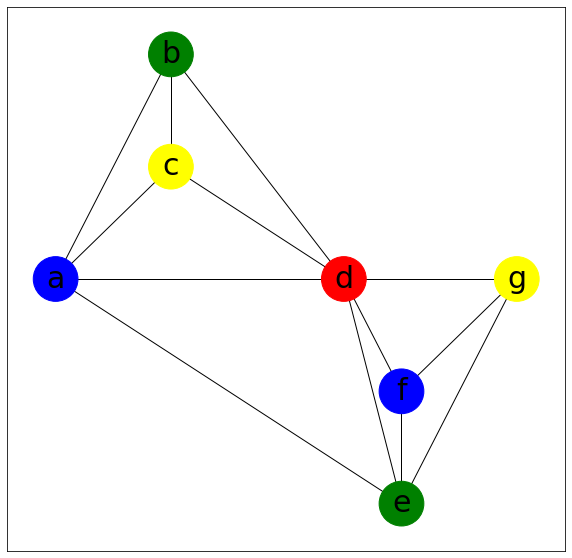

In [109]:
pos = {'a':(0, 2),'b':(1, 4),'c':(1, 3),'d':(2.5, 2),'e':(3, 0),'f':(3, 1),'g':(4, 2)}
draw_colored_graph(dual_graph, pos=pos, color=list(color.values()))

### 2: 앞 [그림 10] 그래프가  'Bipartition' 이 가능한지에 대해 적용해 봅시다. 

In [110]:
import networkx as nx
G1=nx.Graph()
Nodes1=['A', 'B', 'C', 'D']
G1.add_nodes_from(Nodes1)
# adding a list of edges:
Edges= [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')] 
                  
G1.add_edges_from(Edges)
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges())
nx.is_bipartite(G1)

Nodes of graph: 
['A', 'B', 'C', 'D']
Edges of graph: 
[('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')]


True

### 3: 상기  [그림 4] 그래프가  'Bipartition' 이 가능한지에 대해, networkx 패키지를 활용하여 풀어 보세요.

In [111]:
import networkx as nx
G=nx.Graph()
Nodes=['S', 'B', 'L', 'N', 'E', 'F' ]
G.add_nodes_from(Nodes)

# adding a list of edges:
G.add_edges_from([('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), 
                   ('N', 'F'), ('E', 'F') ])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())
nx.is_bipartite(G)

Nodes of graph: 
['S', 'B', 'L', 'N', 'E', 'F']
Edges of graph: 
[('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), ('N', 'F'), ('E', 'F')]


False